# __Import__

In [25]:
import pandas as pd
import numpy as np
import glob
import os
import random
import json 
import matplotlib.pyplot as plt
import seaborn as sns


with open('../config/config.json', 'r') as file:
    config = json.load(file)

# __Data Loading__

In [26]:
def load_data(path, k=100):
    random.seed(42)
    all_files = glob.glob(os.path.join(path, "*.csv"))
    samples = random.sample(all_files, k=k)

    li = []

    for i, filename in enumerate(samples):
        df = pd.read_csv(filename, sep=";")
        df["Sensor"] = i
        df = df.set_index(keys="Sensor", drop=True)
        li.append(df)

    df = pd.concat(li, axis=0, ignore_index=False)

    return df


df = load_data(path = config["data_path"], k=100)

In [27]:
df.columns, df.shape

(Index(['YYYY', 'MM', 'DD', 'DOY', '2m_temp_max', '2m_temp_mean', '2m_temp_min',
        '2m_dp_temp_max', '2m_dp_temp_mean', '2m_dp_temp_min', '10m_wind_u',
        '10m_wind_v', 'fcst_alb', 'lai_high_veg', 'lai_low_veg', 'swe',
        'surf_net_solar_rad_max', 'surf_net_solar_rad_mean',
        'surf_net_therm_rad_max', 'surf_net_therm_rad_mean', 'surf_press',
        'total_et', 'prec', 'volsw_123', 'volsw_4'],
       dtype='object'),
 (1424400, 25))

# __Null Value Analysis__

In [28]:
df.isna().sum()

YYYY                       0
MM                         0
DD                         0
DOY                        0
2m_temp_max                0
2m_temp_mean               0
2m_temp_min                0
2m_dp_temp_max             0
2m_dp_temp_mean            0
2m_dp_temp_min             0
10m_wind_u                 0
10m_wind_v                 0
fcst_alb                   0
lai_high_veg               0
lai_low_veg                0
swe                        0
surf_net_solar_rad_max     0
surf_net_solar_rad_mean    0
surf_net_therm_rad_max     0
surf_net_therm_rad_mean    0
surf_press                 0
total_et                   0
prec                       0
volsw_123                  0
volsw_4                    0
dtype: int64

No missing values

# __Statistical Analysis__

__Correlations__

In [ ]:
sns.heatmap(df.corr())

## __Data Distributions__

### __Precipitation by Sensors from 1981 - 2019__

/var/folders/6l/6v6rmk9141928hf9tsw7qqxw0000gn/T/ipykernel_30801/2638371425.py:8: UserWarning: 
The palette list has fewer values (1) than needed (100) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(yearly_sensors, x="YYYY", y="prec", hue="Sensor", palette=["#d1d6de"], legend=None, linewidth=0.5) # ["#808080"] , "#dcdfe3"


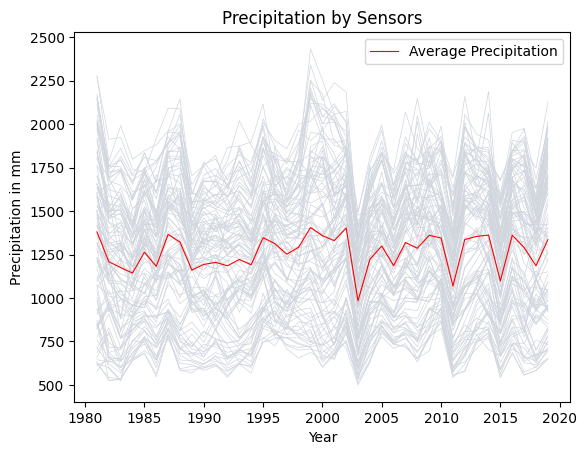

In [ ]:
# sensor prec by year
yearly_sensors = df.groupby(["YYYY","Sensor"]).sum()
yearly_sensors = yearly_sensors["prec"].reset_index()

# average sensor prec by year
yearly_sensor_avg = df.groupby(["YYYY","Sensor"])["prec"].sum().groupby("YYYY").mean().reset_index()

sns.lineplot(yearly_sensors, x="YYYY", y="prec", hue="Sensor", palette=["#d1d6de"], legend=None, linewidth=0.5) # ["#808080"] , "#dcdfe3"
sns.lineplot(yearly_sensor_avg, x="YYYY", y="prec", color="red", label="Average Precipitation", legend=True, linewidth=0.8)
plt.ylabel("Precipitation in mm")
plt.xlabel("Year")
plt.title("Total Precipitation by Sensors (1981-2019)")
plt.show()

### __Average Precipiation by Month (1981 - 2019)__

average per month across the sensors

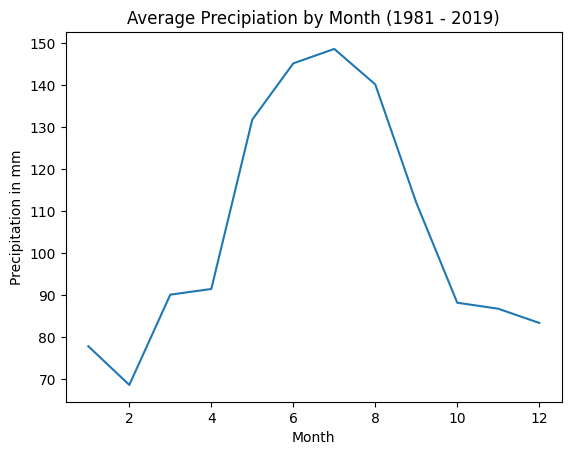

In [ ]:
monthly_avg = df.groupby(['YYYY', 'MM', 'Sensor'])["prec"].sum().groupby("MM").mean()

plt.plot(monthly_avg)
plt.title("Average Precipiation by Month (1981 - 2019)")
plt.ylabel("Precipitation in mm")
plt.xlabel("Month")
plt.show()

### __Total Precipiation by Year (1981 - 2019)__
total prec of all sensors by year

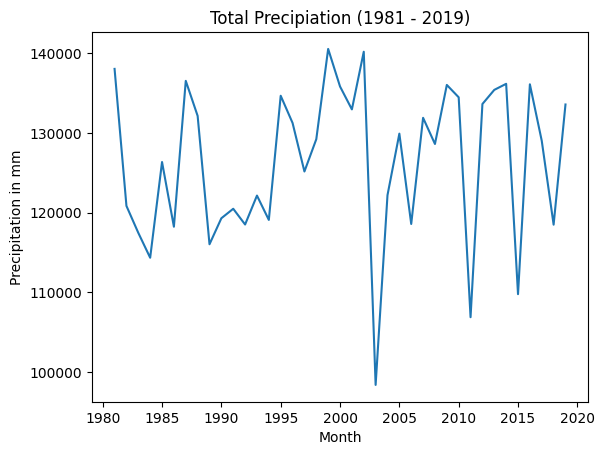

In [ ]:
yearly_sum = df.groupby(['YYYY', 'MM'])["prec"].sum()
yearly_sum_avg = yearly_sum.groupby('YYYY').sum()

plt.plot(yearly_sum_avg)
plt.title("Total Precipiation (1981 - 2019)")
plt.ylabel("Precipitation in mm")
plt.xlabel("Month")
plt.show()

# __Preprocessing__

__Cyclic Encoding__

In [21]:
df['MM_sin'] = np.sin(2 * np.pi * df['MM']/12.0)
df['MM_cos'] = np.cos(2 * np.pi * df['MM']/12.0)

df['DOY_sin'] = np.sin(2 * np.pi * df['DOY']/365.0)
df['DOY_cos'] = np.cos(2 * np.pi * df['DOY']/365.0)

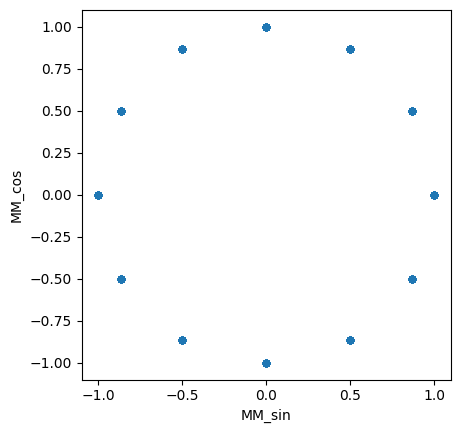

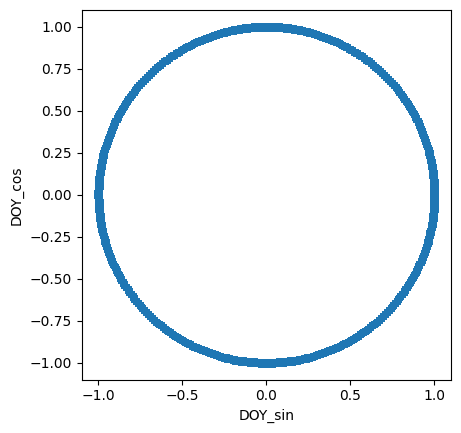

In [ ]:
ax = df.plot.scatter('MM_sin', 'MM_cos').set_aspect('equal')
ax = df.plot.scatter('DOY_sin', 'DOY_cos').set_aspect('equal')

__Set Multi-Index__

In [24]:
df = df.reset_index()
df = df.set_index([df["YYYY"].rename("Year"), df["MM"].rename("Month"), df["DD"].rename("Day"), df["Sensor"]], drop=True)
df = df.drop(columns=["YYYY", "MM", "DD", "DOY", "Sensor"], axis=1)
df = df.sort_index()
df.head()

2m_temp_max  2m_temp_mean  2m_temp_min  2m_dp_temp_max  \
Year Month Day Sensor                                                           
1981 1     1   0               1.4           0.1         -2.0            -0.8   
               1               1.4           0.1         -2.1            -0.9   
               2               0.0          -1.5         -2.9            -1.1   
               3               2.6          -0.3         -3.9            -0.4   
               4               2.3          -1.7         -7.0            -1.3   

                       2m_dp_temp_mean  2m_dp_temp_min  10m_wind_u  \
Year Month Day Sensor                                                
1981 1     1   0                  -2.8            -4.6         5.9   
               1                  -2.9            -4.6         5.6   
               2                  -2.8            -4.2         4.4   
               3                  -3.6            -6.7         4.2   
               4                  -4.8            -8.8         3.6   

                       10m_wind_v  fcst_alb  lai_high_veg  ...  \
Year Month Day Sensor                                      ...   
1981 1     1   0              0.5      0.22           1.3  ...   
               1              0.4      0.23           1.5  ...   
               2              1.1      0.34           1.4  ...   
               3              0.0      0.35           1.1  ...   
               4             -0.3      0.36           1.6  ...   

                       surf_net_therm_rad_mean  surf_press  total_et  prec  \
Year Month Day Sensor                                                        
1981 1     1   0                            40     94065.0      0.63  4.76   
               1                            39     94529.0      0.76  5.47   
               2                            34     92738.0      0.30  7.11   
               3                            37     94502.0      0.39  8.84   
               4                            37     93309.0      0.57  5.90   

                       volsw_123  volsw_4  MM_sin    MM_cos   DOY_sin  \
Year Month Day Sensor                                                   
1981 1     1   0            0.48     0.49     0.5  0.866025  0.017213   
               1            0.40     0.40     0.5  0.866025  0.017213   
               2            0.41     0.41     0.5  0.866025  0.017213   
               3            0.39     0.40     0.5  0.866025  0.017213   
               4            0.39     0.40     0.5  0.866025  0.017213   

                        DOY_cos  
Year Month Day Sensor            
1981 1     1   0       0.999852  
               1       0.999852  
               2       0.999852  
               3       0.999852  
               4       0.999852  

[5 rows x 25 columns]